In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
from utils import leitura_csv

In [2]:
def evoluçao_close():
    df = leitura_csv()
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Preço de Fechamento', color='blue')
    plt.title('Preço de Fechamento da Ação da Google (2015-2024)')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [3]:
def media_volume():
    df = leitura_csv()
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    media = df.groupby(['year', 'month'])['Volume'].mean()

    plt.figure(figsize=(15, 7)) 
    media.plot(kind='bar', color='skyblue') 
    plt.title('Média Mensal de Volume por Ano')
    plt.xlabel('Ano e Mês')
    plt.ylabel('Volume Médio')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [4]:
def variacao_preço_ano():
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    variacao = df.groupby('year')['Close'].agg(lambda x: x.max() - x.min())
    print(variacao)
    plt.figure(figsize=(12,6))
    variacao.plot(kind='bar', color='tomato', edgecolor='black')
    plt.title('Variação Anual do Preço de Fechamento')
    plt.xlabel('Ano')
    plt.ylabel('Variação de Preço ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

year
2015    14.85
2016     7.73
2017    13.86
2018    15.05
2019    16.85
2020    38.54
2021    63.70
2022    64.57
2023    55.32
2024    65.26
Name: Close, dtype: float64


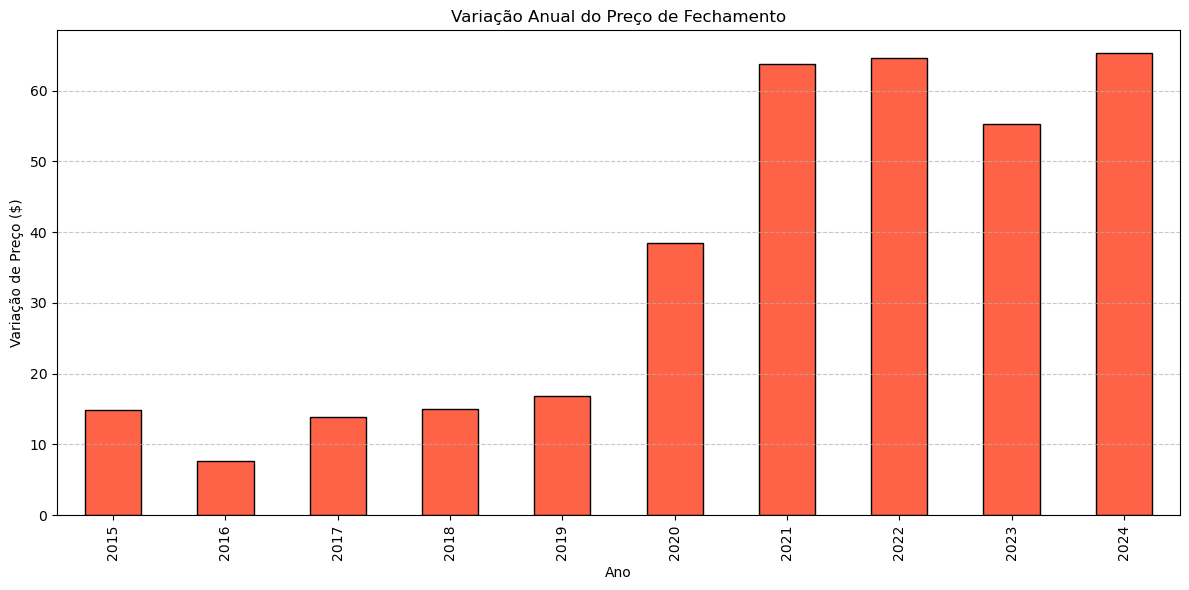

In [5]:
variacao_preço_ano()

In [6]:
def desvio_padrao():
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    desvio_padrao = df.groupby(['year','month'])['Close'].std().unstack()
    print(desvio_padrao)
    plt.figure(figsize=(15, 6))
    plt.imshow(desvio_padrao, aspect='auto', cmap='hot', interpolation='nearest')
    plt.title('Volatilidade Mensal do Preço de Fechamento (Desvio Padrão)')
    plt.xlabel('Mês')
    plt.ylabel('Ano')
    plt.colorbar(label='Desvio Padrão')
    plt.xticks(ticks=range(12), labels=range(1, 13))
    plt.yticks(ticks=range(len(desvio_padrao.index)), labels=desvio_padrao.index)
    plt.show()

In [7]:
def analise_de_tendencias():
    df = leitura_csv()
    df['media_movel'] = df['Close'].rolling(window=30).mean()
    print(df['media_movel'])
    plt.figure(figsize=(15, 6))
    plt.plot(df['Date'], df['Close'], label='Preço de Fechamento', alpha=0.5)
    plt.plot(df['Date'], df['media_movel'], label='Média Móvel (30 dias)', color='red')
    plt.title('Tendência do Preço de Fechamento com Média Móvel (30 dias)')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
def detecta_anomalias(ano_escolhido=2020):
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    df = df[df['year'] == ano_escolhido]
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    medias = df.groupby(['month', 'day'])['Close'].mean()
    desvios = df.groupby(['month', 'day'])['Close'].std()

    df['media_dia'] = df.apply(lambda row: medias.loc[(row['month'], row['day'])], axis=1)
    df['std_dia'] = df.apply(lambda row: desvios.loc[(row['month'], row['day'])], axis=1)

    df['anomalia'] = (df['Close'] > df['media_dia'] + 2 * df['std_dia']) | \
                     (df['Close'] < df['media_dia'] - 2 * df['std_dia'])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 6))
    plt.plot(df['Date'], df['Close'], label='Fechamento')
    plt.scatter(df[df['anomalia']]['Date'], df[df['anomalia']]['Close'],
                color='red', label='Anomalias', zorder=5)
    plt.title(f'Anomalias no Preço de Fechamento em {ano_escolhido}')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [9]:
def prev_tendencias():
    df = leitura_csv()
    df['media_curta'] = df['Close'].rolling(window = 20).mean()
    df['media_longa'] = df['Close'].rolling(window = 50).mean()
    df['compra'] = (df['media_curta'] > df['media_longa']) & (df['media_curta'].shift(1) <= df['media_longa'].shift(1))
    df['venda'] = (df['media_curta'] < df['media_longa']) & (df['media_curta'].shift(1) >= df['media_longa'].shift(1))
    
    plt.figure(figsize=(15,6))
    plt.plot(df['Date'], df['Close'], label='Preço Fechamento', color='gray', alpha=0.4)
    plt.plot(df['Date'], df['media_curta'], label='Média Curta (20)', color='blue')
    plt.plot(df['Date'], df['media_longa'], label='Média Longa (50)', color='orange')

    plt.scatter(df.loc[df['compra'], 'Date'], df.loc[df['compra'], 'Close'], label='Compra', marker='^', color='green', s=100)
    plt.scatter(df.loc[df['venda'], 'Date'], df.loc[df['venda'], 'Close'], label='Venda', marker='v', color='red', s=100)

    plt.title('Análise de Tendência com Médias Móveis')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
def retorno_diario():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    plt.figure(figsize=(10, 6))
    plt.hist(df['retorno_diario'].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribuição dos Retornos Diários')
    plt.xlabel('Retorno Diário (%)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    media = df['retorno_diario'].mean()
    desvio = df['retorno_diario'].std()
    print(f"Media:{media}")
    print(f"Desvio:{desvio}")

In [11]:
def volatilidade_anual():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year
    volatilidade_anual = df.groupby('year')['retorno_diario'].std()*np.sqrt(252) #multiplicando pelo numero medio de pregoes(dias uteis da bolsa) por ano
    plt.figure(figsize=(12, 6))
    volatilidade_anual.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Volatilidade Anual das Ações')
    plt.xlabel('Ano')
    plt.ylabel('Volatilidade Anual (Desvio Padrão)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    return volatilidade_anual

In [12]:
def sharpe_ratio_anual():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year
    retorno_medio_anual = df.groupby('year')['retorno_diario'].mean()*253
    volatilidade_anual = df.groupby('year')['retorno_diario'].std()*np.sqrt(252)
    sharpe_ratio = retorno_medio_anual/volatilidade_anual
    print(sharpe_ratio)
    plt.figure(figsize=(12, 6))
    sharpe_ratio.plot(kind='bar', color='mediumseagreen', edgecolor='black')
    plt.title('Sharpe Ratio Anual')
    plt.xlabel('Ano')
    plt.ylabel('Sharpe Ratio')
    plt.axhline(y=1, color='red', linestyle='--', label='Referência: 1.0')
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [13]:
def identificar_drawdowns():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['valor_acumulado'] = (1+df['retorno_diario']).cumprod()
    df['pico'] = df['valor_acumulado'].cummax()
    df['drawdown'] = (df['valor_acumulado'] - df['pico'])/ df['pico']
    print(df['drawdown'])
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['valor_acumulado'], label='Valor Acumulado')
    plt.fill_between(df['Date'], df['drawdown'], 0, color='red', alpha=0.3, label='Drawdown')
    plt.title('Drawdown ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Valor / Drawdown')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:
def comparativo_ano_perfomance():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year

    retorno_anual = df.groupby('year')['retorno_diario'].mean() * 253
    volatilidade_anual = df.groupby('year')['retorno_diario'].std() * np.sqrt(252)
    sharpe_ratio = retorno_anual / volatilidade_anual

    comparativo = pd.DataFrame({
        'Retorno Anual(%)': retorno_anual*100,
        'Volatilidade(%)': volatilidade_anual*100,
        'Sharpe Ratio': sharpe_ratio
    })
    comparativo = comparativo.round(2)
    print(comparativo)
    comparativo[['Retorno Anual(%)', 'Volatilidade(%)']].plot(kind='bar', figsize=(14,6))
    plt.title('Comparação de Anos: Retorno vs Volatilidade')
    plt.ylabel('Percentual (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    comparativo['Sharpe Ratio'].plot(kind='line', marker='o', color='green', linewidth=2)
    plt.title('Sharpe Ratio por Ano')
    plt.ylabel('Sharpe Ratio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
def melhores_piores_dias():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year

    melhores_idx = df.groupby('year')['retorno_diario'].idxmax()
    melhores_dias = df.loc[melhores_idx, ['Date', 'year', 'retorno_diario', 'Close']]
    print("Melhores dias por ano:")
    print(melhores_dias.sort_values('year'))

    piores_idx = df.groupby('year')['retorno_diario'].idxmin()
    piores_dias = df.loc[piores_idx, ['Date', 'year', 'retorno_diario', 'Close']]
    print("\nPiores dias por ano:")
    print(piores_dias.sort_values('year'))
    plt.figure(figsize=(14, 6))
    plt.scatter(melhores_dias['Date'], melhores_dias['retorno_diario'] * 100, color='green', label='Melhores Dias')
    plt.scatter(piores_dias['Date'], piores_dias['retorno_diario'] * 100, color='red', label='Piores Dias')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Melhores e Piores Dias por Ano (% Retorno Diário)')
    plt.xlabel('Data')
    plt.ylabel('Retorno Diário (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()()


In [16]:
def padroes_mensais(): #Identificar Padrões Sazonais Mensais nos Retornos
    df = leitura_csv()
    df['month'] = df['Date'].dt.month
    df['retorno_diario'] = df['Close'].pct_change()
    retorno_medio_mensal = df.groupby('month')['retorno_diario'].mean()*100
    plt.figure(figsize=(12, 6))
    retorno_medio_mensal.plot(kind='bar', color='cornflowerblue', edgecolor='black')
    plt.title('Retorno Médio por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Retorno Médio (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(ticks=range(0, 12), labels=[
        'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
        'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
    ], rotation=0)
    plt.tight_layout()
    plt.show()

In [17]:

def calculo_RSI(close, window=14):
    retorno = close.diff()
    ganhos = retorno.apply(lambda x: x if x > 0 else 0)
    perdas = retorno.apply(lambda x: -x if x < 0 else 0)

    media_ganhos = ganhos.rolling(window=window).mean()
    media_perdas = perdas.rolling(window=window).mean()

    RS = media_ganhos / media_perdas
    RSI = 100 - (100 / (1 + RS))


    return RSI


In [18]:
def calculate_MACD(series, fast=12, slow=26, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd - signal_line

In [19]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

def random_forest(anos_prev=20):
    df = leitura_csv()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Return'] = df['Close'].pct_change()
    df['SMA5'] = df['Close'].rolling(5).mean()
    df['SMA10'] = df['Close'].rolling(10).mean()
    df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['RSI14'] = calculo_RSI(df['Close'])
    df['MACD'] = calculate_MACD(df['Close'])
    df['Return_1'] = df['Return'].shift(1)
    df['Return_2'] = df['Return'].shift(2)
    df['Target'] = (df['Return'].shift(-1) > 0).astype(int)
    df = df.dropna()

    X = df.drop(['Target'], axis=1).select_dtypes(include=[np.number])
    y = df['Target']

    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    model = RandomForestClassifier(
        n_estimators=300, max_depth=8, min_samples_leaf=5, random_state=42
    )
    model.fit(X_res, y_res)

    previsoes = []
    datas_prev = []

    last_date = df.index[-1]
    ultimo_preco = df['Close'].iloc[-1]
    volatilidade = df['Return'].std()

    for i in range(anos_prev):
        ultima_linha = df.iloc[-1:].copy()
        X_input = ultima_linha.drop(['Target'], axis=1).select_dtypes(include=[np.number])
        y_pred = model.predict(X_input)[0]

        if y_pred == 1:
            retorno = abs(np.random.normal(loc=volatilidade/2, scale=volatilidade))
        else:
            retorno = -abs(np.random.normal(loc=volatilidade/2, scale=volatilidade))

        novo_preco = ultima_linha['Close'].values[0] * (1 + df['Return'].mean() + np.random.normal(0, df['Return'].std()))
        nova_data = last_date + pd.DateOffset(years=i+1)

        previsoes.append(novo_preco)
        datas_prev.append(nova_data)

        ultima_linha.loc[ultima_linha.index[0], 'Close'] = novo_preco
        df.loc[nova_data] = ultima_linha.iloc[0]
        df['Return'] = df['Close'].pct_change()
        df['SMA5'] = df['Close'].rolling(5).mean()
        df['SMA10'] = df['Close'].rolling(10).mean()
        df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
        df['RSI14'] = calculo_RSI(df['Close'])
        df['MACD'] = calculate_MACD(df['Close'])
        df['Return_1'] = df['Return'].shift(1)
        df['Return_2'] = df['Return'].shift(2)

        ultimo_preco = novo_preco

    plt.figure(figsize=(14,7))
    plt.plot(df.index, df['Close'], label='Histórico', color='blue')
    plt.plot(datas_prev, previsoes, label='Previsão futura', color='orange', marker='o')
    plt.title(f'Previsão {anos_prev} anos à frente')
    plt.xlabel("Date")
    plt.ylabel("Preço")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pd.DataFrame({"Date": datas_prev, "Preco_Previsto": previsoes})


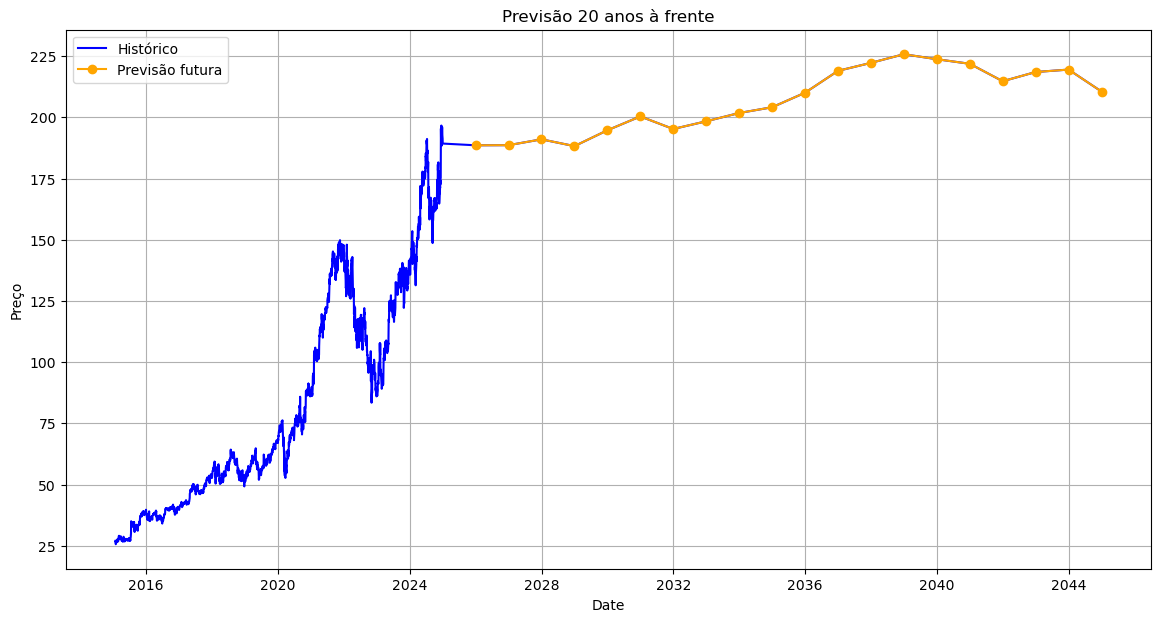

,Date,Preco_Previsto
0,2025-12-31 16:00:00,188.593425
1,2026-12-31 16:00:00,188.642146
2,2027-12-31 16:00:00,191.027796
3,2028-12-31 16:00:00,188.256667
4,2029-12-31 16:00:00,194.734960
5,2030-12-31 16:00:00,200.383964
6,2031-12-31 16:00:00,195.256198
7,2032-12-31 16:00:00,198.406083
8,2033-12-31 16:00:00,201.788052
9,2034-12-31 16:00:00,204.134232


In [20]:
random_forest()